<a href="https://colab.research.google.com/github/Riddars/BeerProject/blob/main/BeerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit
!pip install pycaret
!pip install lazypredict
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import GridSearchCV
import networkx as nx


import lazypredict
from lazypredict.Supervised import LazyRegressor #Regression

import pickle

import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.5 MB/s eta 0

In [7]:
data_df = pd.read_csv('https://raw.githubusercontent.com/Riddars/BearProject/main/recipeData.csv', encoding='ISO-8859-1')


In [ ]:
data_df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [8]:
# Укажите список столбцов, которые вы хотите удалить
columns_to_drop = ['BeerID', 'URL', 'Style', 'UserId', 'Name', 'PrimaryTemp', 'PitchRate', 'MashThickness']

# Используйте метод drop для удаления столбцов
data_df.drop(columns=columns_to_drop, inplace=True)

(73861, 15)


<Axes: >

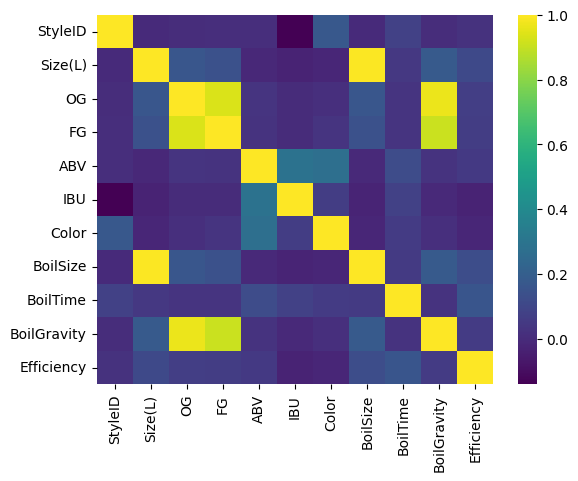

In [9]:
# посмотрим корреляцию столбцов с числовыми значениями
print(data_df.shape)
sns.heatmap(data_df.corr(), cmap='viridis', yticklabels=True)

In [15]:
data_df.dropna(subset=['BoilGravity'], inplace=True)

**Encoding**


---




In [10]:
le = LabelEncoder()
text_data_features = ['SugarScale', 'BrewMethod', 'PrimingMethod', 'PrimingAmount']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    data_df[i] = le.fit_transform(data_df[i])
    l3.append(list(data_df[i].unique())); l4.append(list(le.inverse_transform(data_df[i].unique())))
    print(i,' : ',data_df[i].unique(),' = ',le.inverse_transform(data_df[i].unique()))

Label Encoder Transformation


 50%|█████     | 2/4 [00:00<00:00, 16.04it/s]

SugarScale  :  [1 0]  =  ['Specific Gravity' 'Plato']
BrewMethod  :  [0 3 1 2]  =  ['All Grain' 'extract' 'BIAB' 'Partial Mash']
PrimingMethod  :  [703 874 595 211 512 427 326 340 365 255 748 273 594 567 313 414 775 150
  33 815 232 235 495 349 424 400 604 436 833 338 262 562 715 449 565 168
 250 351 857 456 304 303  83 470  80 764 227 372 613 258 670 467 410 215
 341 664 855 265 330 458 795 202 829 286 725 834 247 353 445 197 534 608
 788  14  54 643   2 519 491 821 319  57 102 176 689 753 133 382 773 285
 127 697 453 502 483 396 576 503 807 645 207 622 755 226 251 856 752 290
 131  35 751 325 473 403 674 735 148 818 189 472  12 314 695 471 218 358
 633 839 782 228 568 199 789 236 800 859  58 334 295 187 481 364 347  40
 726 792 823 522 388  61 175 574 135  15 344 785   9 518 425  17 851 345
 804 750 830  37 681 355 635  56 485  92 705 535 868 327 873 749 408  96
 762 740 120 711 237 808 571 546 791 264 220 842 450 143 171 766 716 188
 702 553 586 126 761 841 682 441 359 389 639 772 6

100%|██████████| 4/4 [00:00<00:00, 13.15it/s]

PrimingAmount  :  [1192 1896 1478 ... 1219  492 1591]  =  ['4.5 oz' nan '6-7 g sukker/l' ...
 '4.79oz for 6gal  4.5oz for 5.75  4.32 for 5.5gal  4.12oz for 5.25gal  3.93oz for 5 gal.'
 '13.5' '7 gram / liter']


In [ ]:
# Укажите список столбцов, которые вы хотите исключить
columns_to_exclude = ['SugarScale', 'BrewMethod', 'PrimingMethod', 'PrimingAmount']

# Получите список всех столбцов и исключите ненужные
columns_to_keep = [col for col in data_df.columns if col not in columns_to_exclude]

# Выведите названия столбцов, которые вы хотите оставить
print(columns_to_keep)

['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']


**Нормализация числовых значений (кроме закодированых)**

---



In [11]:
# Ваши данные и столбцы для нормализации
columns_to_normalize = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']

# Получите минимальные и максимальные значения для каждого столбца до нормализации
min_values_before = data_df[columns_to_normalize].min()
max_values_before = data_df[columns_to_normalize].max()

print("Минимальные значения до нормализации:")
print(min_values_before)

print("Максимальные значения до нормализации:")
print(max_values_before)

Минимальные значения до нормализации:
Size(L)        1.00
OG             1.00
FG            -0.00
ABV            0.00
IBU            0.00
Color          0.00
BoilSize       1.00
BoilTime       0.00
BoilGravity    0.00
Efficiency     0.00
dtype: float64
Максимальные значения до нормализации:
Size(L)       9200.00
OG              34.03
FG              23.42
ABV             54.72
IBU           3409.30
Color          186.00
BoilSize      9700.00
BoilTime       240.00
BoilGravity     52.60
Efficiency     100.00
dtype: float64


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70871 entries, 0 to 73860
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StyleID        70871 non-null  int64  
 1   Size(L)        70871 non-null  float64
 2   OG             70871 non-null  float64
 3   FG             70871 non-null  float64
 4   ABV            70871 non-null  float64
 5   IBU            70871 non-null  float64
 6   Color          70871 non-null  float64
 7   BoilSize       70871 non-null  float64
 8   BoilTime       70871 non-null  int64  
 9   BoilGravity    70871 non-null  float64
 10  Efficiency     70871 non-null  float64
 11  SugarScale     70871 non-null  int64  
 12  BrewMethod     70871 non-null  int64  
 13  PrimingMethod  70871 non-null  int64  
 14  PrimingAmount  70871 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 8.7 MB


In [17]:
nan_count = data_df.isna().sum()

# Выведите результат
print(nan_count)

StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
SugarScale       0
BrewMethod       0
PrimingMethod    0
PrimingAmount    0
dtype: int64


In [ ]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data_df.drop('IBU', axis=1)
y = data_df['IBU']

# Создание модели случайного леса с настраиваемыми параметрами
model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,  # Минимальное количество образцов для разделения
    min_samples_leaf=1,  # Минимальное количество образцов в листовом узле
    random_state=42,
    bootstrap=True,  # Использовать метод бутстрэпа
    oob_score=False,  # Использовать out-of-bag оценку
    criterion='squared_error'  # Функция для измерения качества разделения
)

# Обучение модели случайного леса на всем наборе данных
model.fit(X, y)

# Предсказание на всем наборе данных
y_pred = model.predict(X)

# Оценка производительности модели на всем наборе данных
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[0]	validation_0-rmse:59.04468
[1]	validation_0-rmse:55.28763
[2]	validation_0-rmse:52.41499
[3]	validation_0-rmse:49.53835
[4]	validation_0-rmse:47.42734
[5]	validation_0-rmse:45.94218
[6]	validation_0-rmse:44.66758
[7]	validation_0-rmse:43.55731
[8]	validation_0-rmse:42.12335
[9]	validation_0-rmse:41.21100
[10]	validation_0-rmse:40.17602
[11]	validation_0-rmse:39.70291
[12]	validation_0-rmse:38.82132
[13]	validation_0-rmse:38.37756
[14]	validation_0-rmse:38.19222
[15]	validation_0-rmse:37.89680
[16]	validation_0-rmse:37.59155
[17]	validation_0-rmse:37.52852
[18]	validation_0-rmse:37.56863
[19]	validation_0-rmse:37.44663
[20]	validation_0-rmse:37.33031
[21]	validation_0-rmse:37.40817
[22]	validation_0-rmse:37.36373
[23]	validation_0-rmse:37.47476
[24]	validation_0-rmse:37.60710
[25]	validation_0-rmse:37.58659
[26]	validation_0-rmse:37.72329
[27]	validation_0-rmse:37.78835
[28]	validation_0-rmse:37.93005
[29]	validation_0-rmse:37.91054
[30]	validation_0-rmse:38.07144
Mean Squared Error

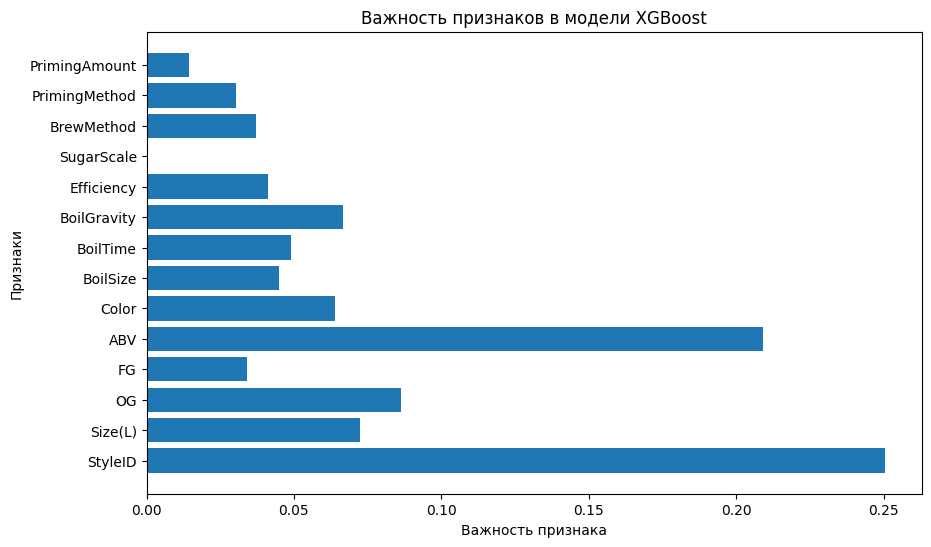

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Разделение данных на признаки (X) и целевую переменную (y)
X = data_df.drop('IBU', axis=1)
y = data_df['IBU']


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и настройка модели градиентного бустинга (XGBoost)
model = xgb.XGBRegressor(
    n_estimators=50,  # Количество деревьев
    learning_rate=0.1,  # Скорость обучения
    max_depth=10,  # Максимальная глубина деревьев
    min_child_weight=1,  # Минимальный вес в узле
    subsample=0.8,  # Доля обучающих данных для каждого дерева
    colsample_bytree=0.8,  # Доля признаков для каждого дерева
    gamma=0,  # Минимальное уменьшение функции потерь
    reg_alpha=0,  # L1 регуляризация
    reg_lambda=1,  # L2 регуляризация
    objective='reg:squarederror',  # Задача оптимизации для регрессии
)

# Обучение модели
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=1)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# важность признаков
feature_importance = model.feature_importances_

# график важности признаков
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_train.columns)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели XGBoost')
plt.show()

Выходные данные были обрезаны до нескольких последних строк (5000).
Predicted: [23.579197], True: 10.56
Predicted: [58.13857], True: 58.84
Predicted: [39.61084], True: 28.85
Predicted: [62.2762], True: 110.91
Predicted: [25.213177], True: 39.93
Predicted: [66.097916], True: 59.5
Predicted: [39.60965], True: 48.8
Predicted: [86.34985], True: 126.85
Predicted: [67.32032], True: 22.3
Predicted: [75.38165], True: 29.3
Predicted: [56.95439], True: 71.26
Predicted: [15.803917], True: 2.94
Predicted: [33.287548], True: 31.82
Predicted: [43.666092], True: 57.69
Predicted: [63.817734], True: 21.4
Predicted: [50.62361], True: 22.46
Predicted: [59.553146], True: 93.85
Predicted: [90.856544], True: 106.6
Predicted: [36.93615], True: 19.79
Predicted: [44.87386], True: 28.88
Predicted: [42.452293], True: 28.71
Predicted: [72.49639], True: 71.27
Predicted: [65.32043], True: 61.66
Predicted: [51.32164], True: 61.08
Predicted: [45.6778], True: 65.76
Predicted: [53.42849], True: 69.1
Predicted: [44.6023

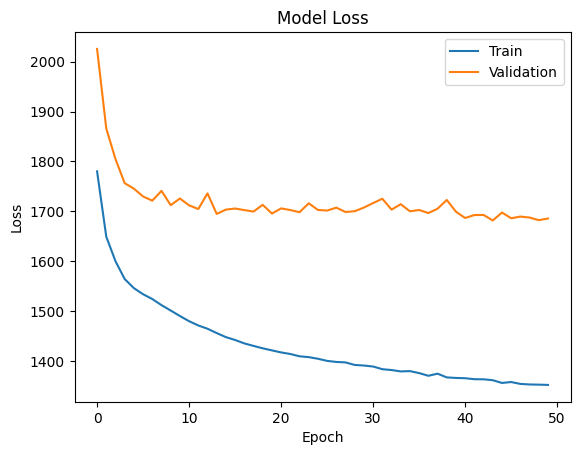

In [29]:

# Загрузка данных
data = data_df

# Подготовка данных
X = data.drop(['IBU'], axis=1).values
y = data['IBU'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели на тестовой выборке
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Использование модели для предсказания значений
predictions = model.predict(X_test)

# Вывод предсказанных значений и соответствующих истинных значений
for i in range(len(predictions)):
    print(f'Predicted: {predictions[i]}, True: {y_test[i]}')

# Вычисление R2-score
r2 = r2_score(y_test, predictions)
print(f'R2-score: {r2}')

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()